# Plotting stuff on a map from post codes

Shape file comes from http://www.opendoorlogistics.com/downloads/
Other useful links:
https://scipython.com/blog/uk-house-price-heatmap/
https://gis.stackexchange.com/questions/131716/plot-shapefile-with-matplotlib
https://gis.stackexchange.com/questions/93136/how-to-plot-geo-data-using-matplotlib-python/93201#93201
https://pypi.python.org/pypi/pyshp


In [1]:
import shapefile as shp
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
import random
from matplotlib.collections import PatchCollection


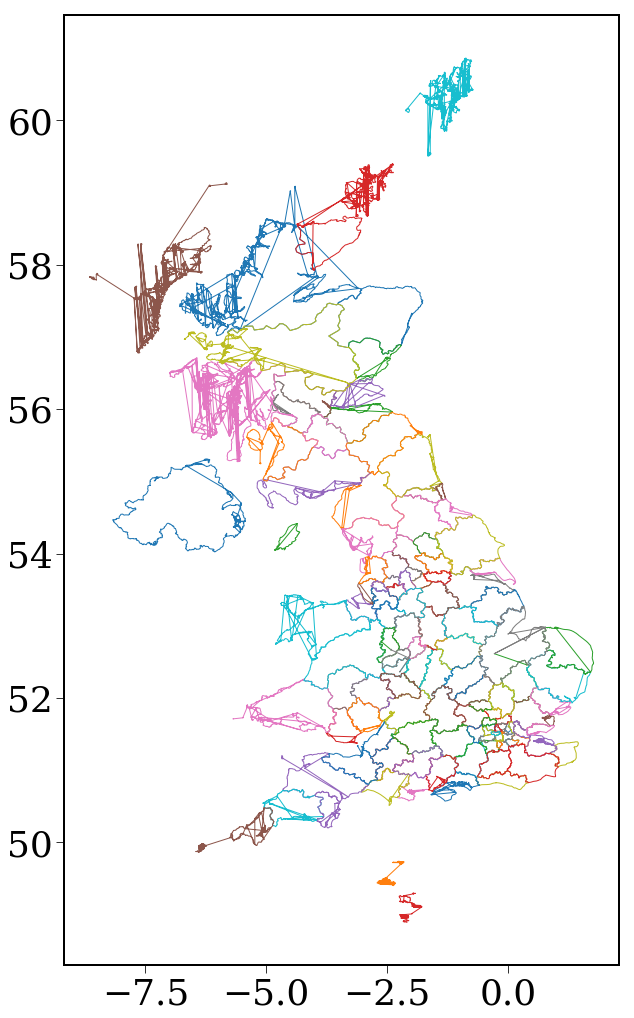

In [2]:
sf = shp.Reader("/home/stew/Distribution/Areas.shp")

plt.figure(figsize=(10,16))
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y,lw=1)
plt.show()

In [3]:
polys  = shp.Reader("/home/stew/Distribution/Areas.dbf")
Areas=np.array(polys.records()).reshape(-1)
A=np.concatenate(([Areas],[np.random.uniform(0,1,len(Areas))]),axis=0).T



In [4]:
random.shuffle(Areas)
tmp_areas=Areas[:50]
Areas.sort()
tmp_areas=Areas


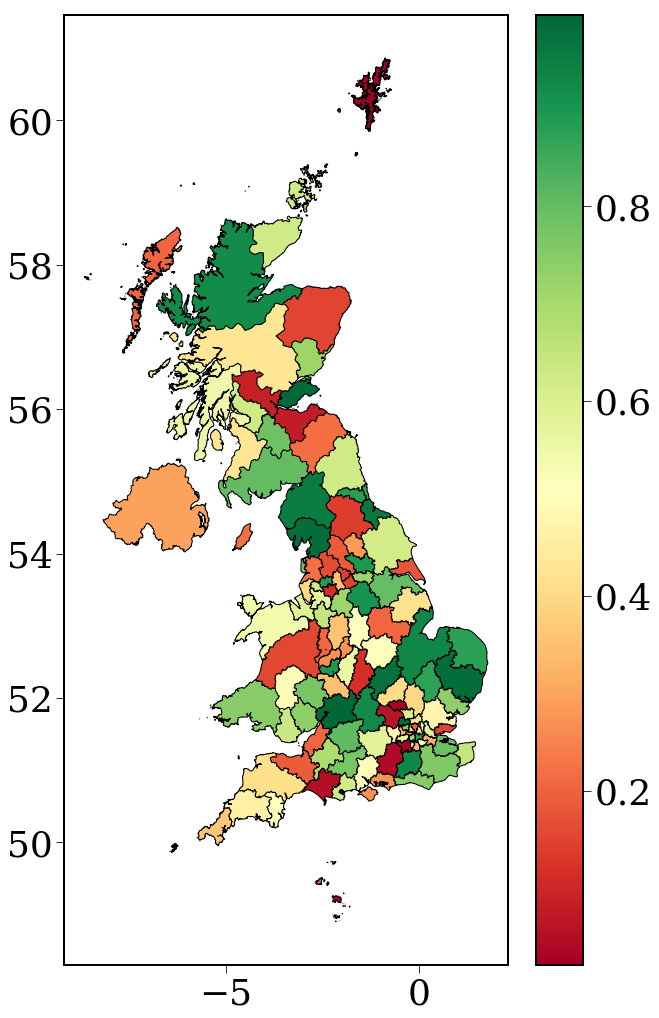

In [5]:


fig = plt.figure(figsize=(10,16)) 

cmap = plt.cm.get_cmap('inferno')
patches=[]

colors=[]

#"""
for shape,name in zip(polys.shapes(),Areas):
    poly=shape.__geo_interface__
    ax = fig.gca()
    if sum(name==tmp_areas)>0:
        R=A.T[1][name==tmp_areas].astype('float')[0]
        colors.append(R)
        c=cmap(R)
        patches.append(PolygonPatch(poly, fc=c, ec= 'k', zorder=2 ))
    else:
        R=0
        ax.add_patch(PolygonPatch(poly, fc='w', ec= 'k', alpha=0.5, zorder=2 ))

    
p = PatchCollection(patches,cmap='RdYlGn',edgecolors='k')
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)  

ax.axis('tight')


plt.show()
